In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import numpy as np
import statsmodels.api as sm
import pylab as py
import scipy

In [3]:
GWAS_RESULTS_FILE = "/cs/labs/michall/roeizucker/IIH/GWAS/results/iih_mod_gwas_with_genes.csv"
PWAS_RESULTS_FILE = "/cs/labs/michall/roeizucker/IIH/PWAS/results/updated_Both.csv"
SKAT_RESULTS_FILE = "/cs/labs/michall/roeizucker/IIH/IIH_results_full.csv"
GWAS_PVAL_THREASHOLD = 5e-7
SKAT_PVAL_THREASHOLD = 5e-5
SKAT_QVAL_THREASHOLD = 0.05
SKAT_USE_FDR = True

In [4]:
gwas_df = pd.read_csv(GWAS_RESULTS_FILE)
pwas_df = pd.read_csv(PWAS_RESULTS_FILE)
skat_df = pd.read_csv(SKAT_RESULTS_FILE)
skat_df['q_values'] = None
p_values = skat_df['P.value'].values

# Apply FDR correction
_, q_values, _, _ = multipletests(p_values, method='fdr_bh')

# Assign the corrected q-values back to the DataFrame
skat_df['q_values'] = q_values

# Print the DataFrame with the corrected q-values

In [5]:
gwas_df_filtered = gwas_df[gwas_df["P"] < GWAS_PVAL_THREASHOLD]
gwas_genes = set(gwas_df_filtered["gene_symbol"].unique())
pwas_genes = set(pwas_df[pwas_df["fdr_significance"]]["symbol"].dropna().unique())
if SKAT_USE_FDR:
    skat_genes = set(skat_df[skat_df["q_values"] < SKAT_QVAL_THREASHOLD]["symbol"].unique())
else:
    skat_genes = set(skat_df[skat_df["P.value"] < SKAT_PVAL_THREASHOLD]["symbol"].unique())

In [6]:
print("all intersection:\t",gwas_genes.intersection(pwas_genes).intersection(skat_genes))
print("gwas,pwas intersection:\t",gwas_genes.intersection(pwas_genes))
print("pwas,skat intersection:\t",pwas_genes.intersection(skat_genes))
print("gwas,skat intersection:\t",gwas_genes.intersection(skat_genes))

all intersection:	 {'RGCC', 'FOXF1'}
gwas,pwas intersection:	 {'RGCC', 'FOXF1'}
pwas,skat intersection:	 {'OASL', 'NOVA2', 'RGCC', 'BARX2', 'FOXF1', 'NME2', 'MFSD14C', 'BARHL1', 'PMM2', 'LYPD1', 'CLDN25'}
gwas,skat intersection:	 {'FGFR1', 'EEF2K', 'SLC28A3', 'TRMT5', 'RGCC', 'IRGQ', 'PEX11A', 'FOXF1', 'LSM11', 'NUSAP1', 'TPO', 'MAPK15'}


## create QQ plot

In [7]:
scipy.stats.distributions.uniform(0,1)

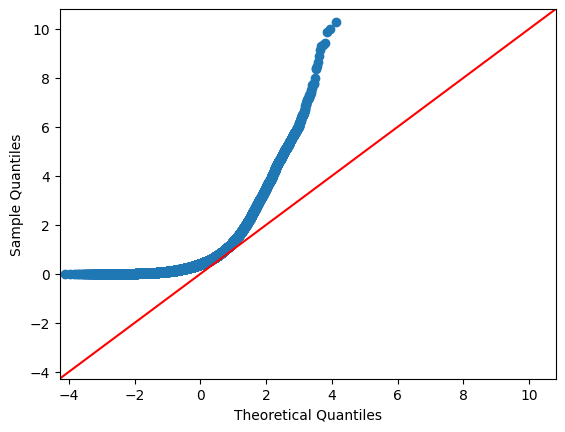

In [8]:
vals = -np.log10(np.array(list(gwas_df["P"])))
# sm.qqplot(vals,dist=scipy.stats.distributions.uniform(0,10.29002911757207),line="45")
# sm.qqplot(vals,line="45")
sm.qqplot(vals,line="45")

py.show()



In [113]:
min(gwas_df["P"])

5.12827e-11

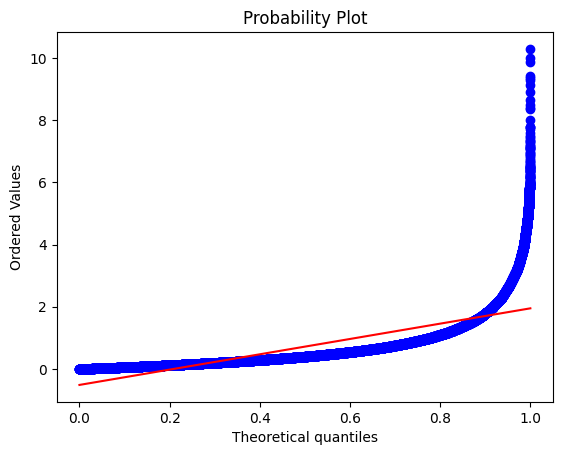

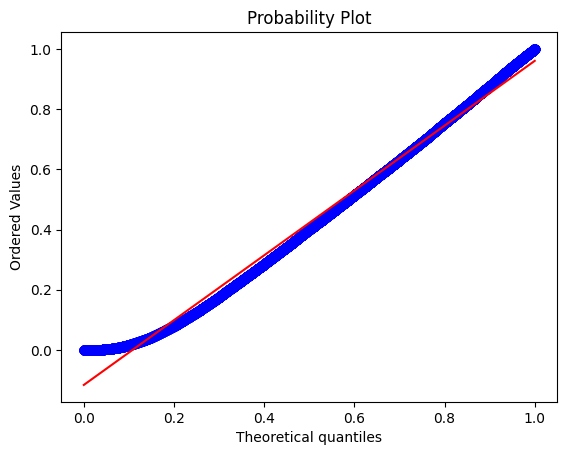

In [9]:
scipy.stats.probplot(-np.log10(np.array(list(gwas_df["P"]))), dist="uniform", plot=py)
py.show()
scipy.stats.probplot((np.array(list(gwas_df["P"]))), dist="uniform", plot=py)

py.show()


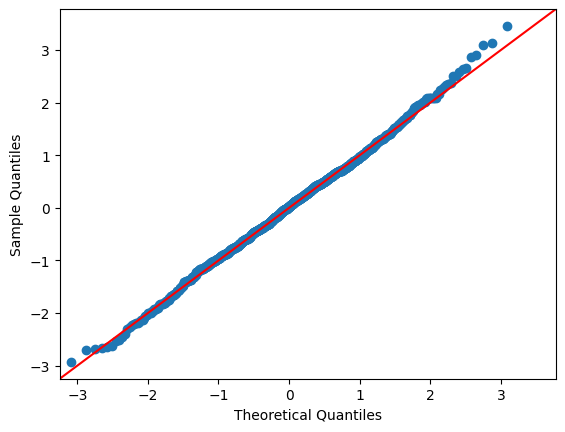

In [101]:
test = np.random.normal(0,1, 1000)

sm.qqplot(test, line='45')
py.show()
